Haber Başlığı Benzerlik Analizi - Ödev 2
Veri setleri yükleniyor...
Lemmatized veri: 800 kayıt
Stemmed veri: 800 kayıt
Modeller yükleniyor...
Toplam 18 model yüklendi
Örnek giriş metni seçiliyor...
Mevcut başlık örnekleri:
1. Ataşehir'de "Çedes ve Geleneksel Çocuk Oyunları Şenliği" düzenlendi
2. YÜKSEL AYTUĞ / Mavi değil, sarı bayrak lazım
3. İstanbul'da kene tehlikesi! Bu yıl 7 bin 2 kene ısırması vakası yaşandı
4. Bundesbank'tan kara senaryo: Petrol fiyatları önemli ölçüde artabilir
5. Gece başlayan saldırılar piyasayı hareketlendirdi: Euro yeni rekoru gördü, petrol fiyatları fırladı

Seçilen giriş metni: Ataşehir'de "Çedes ve Geleneksel Çocuk Oyunları Şenliği" düzenlendi
Lemmatized: ataşehir de çedes ve geleneksel çocuk oyunları şenliği düzenlendi
Stemmed: ataşehir de çedes ve geleneksel çocuk oyunlar şenliğ düzenlend
Tüm modeller için benzerlik hesaplamaları başlıyor...

TF-IDF lemmatized benzerliği hesaplanıyor...

TF-IDF stemmed benzerliği hesaplanıyor...
w2v_lemmatized_1 benzerl

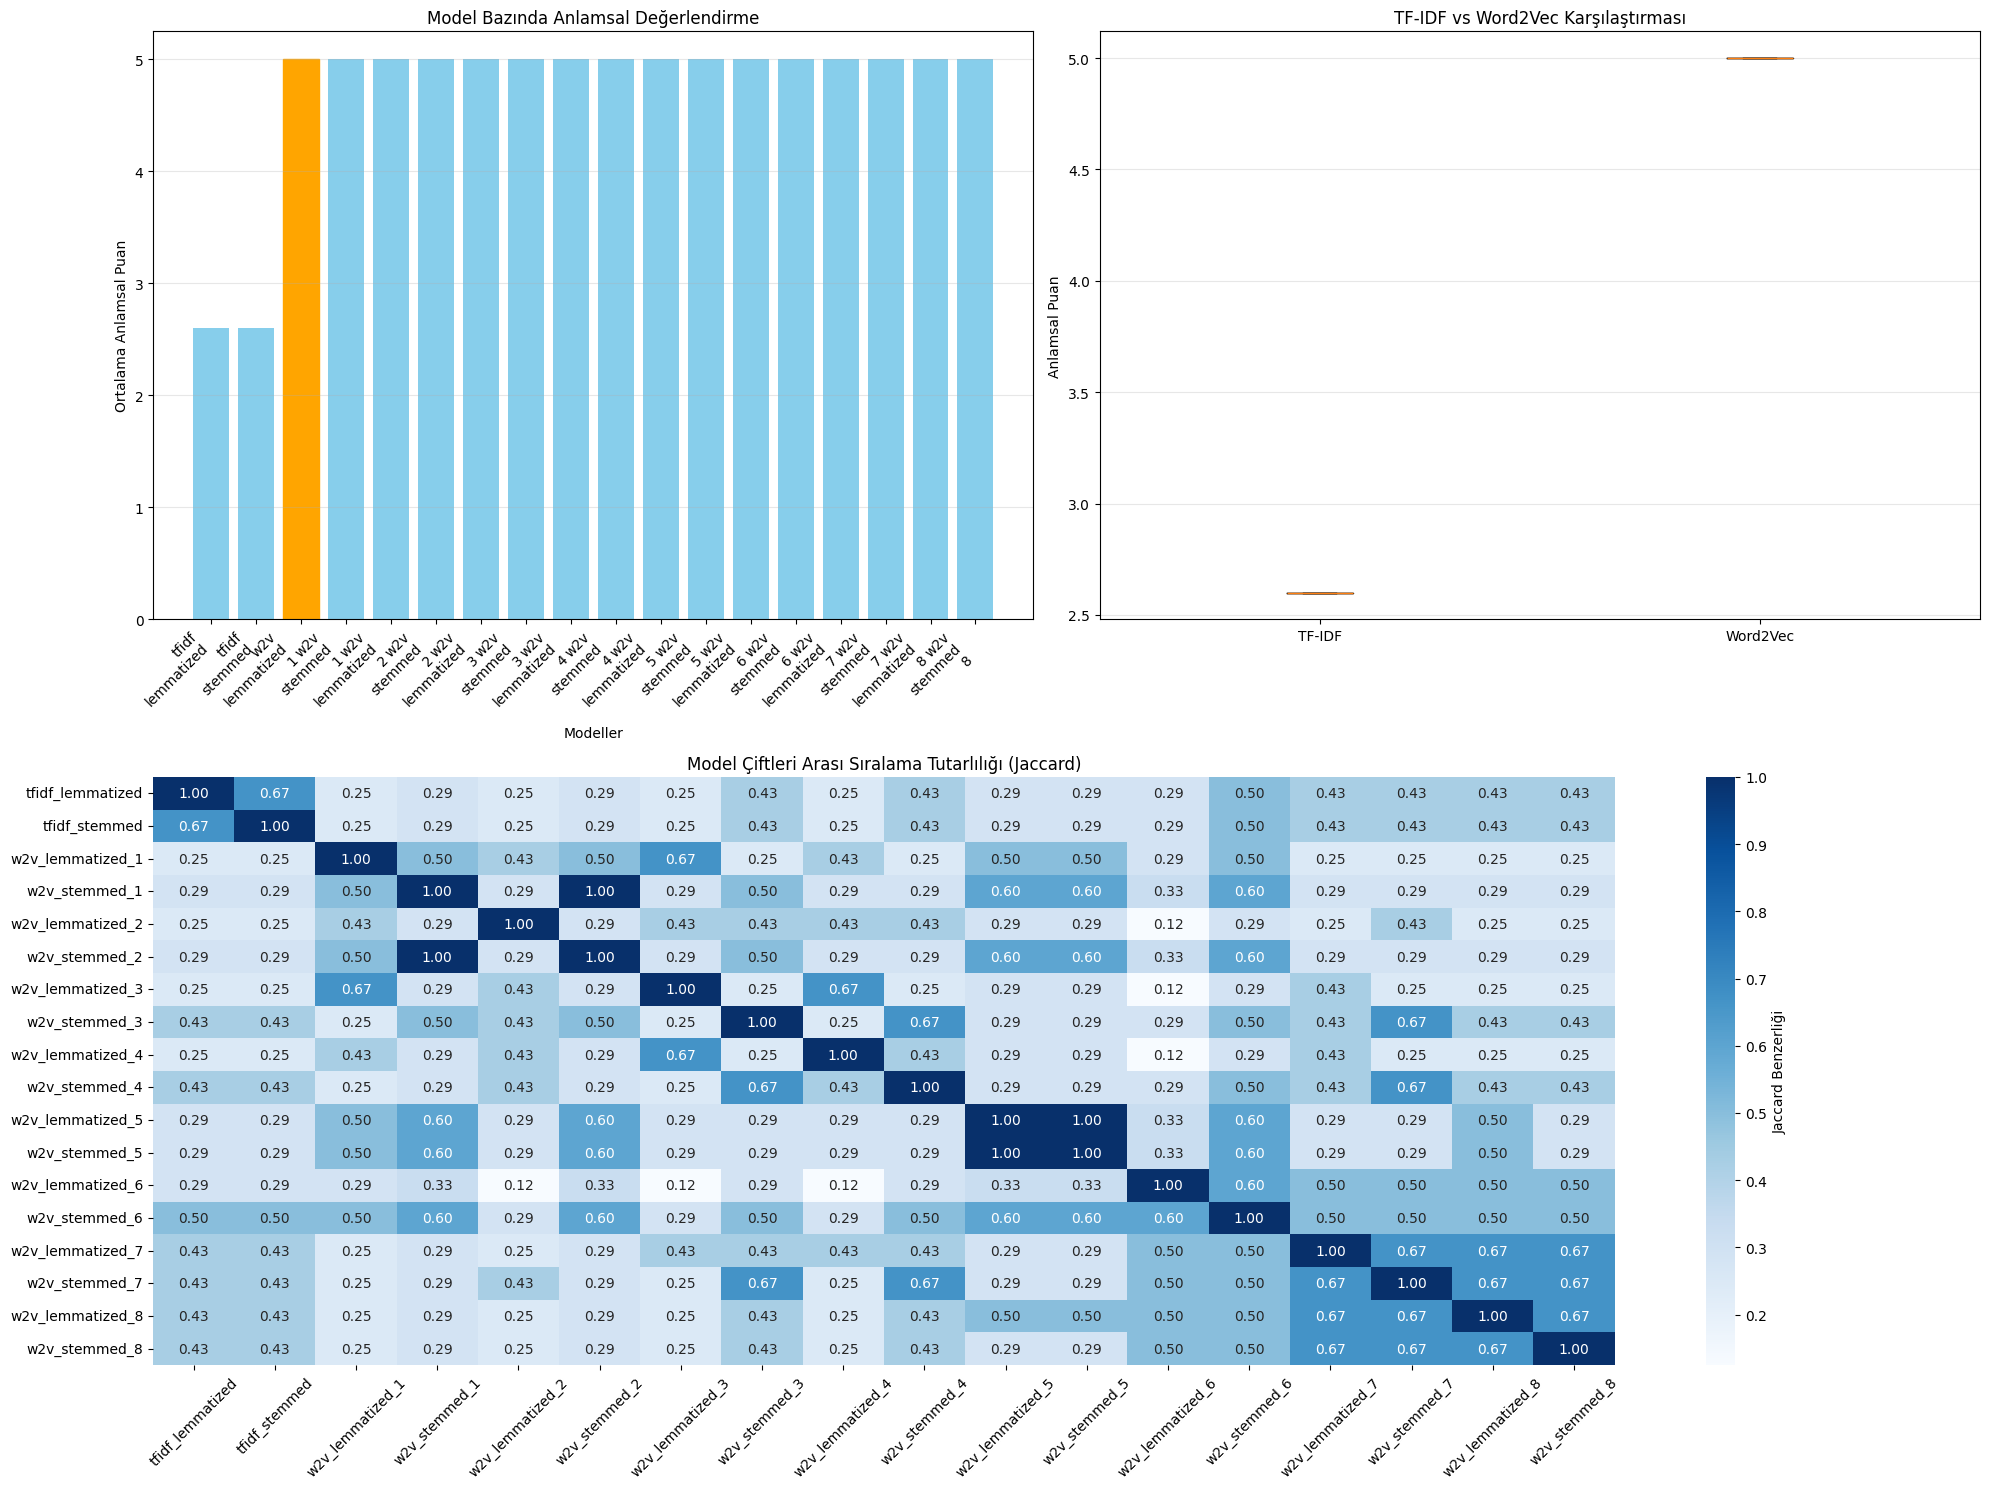


DETAYLI SONUÇLAR

GİRİŞ METNİ: Ataşehir'de "Çedes ve Geleneksel Çocuk Oyunları Şenliği" düzenlendi
--------------------------------------------------

TFIDF_LEMMATIZED MODELİ SONUÇLARI:
----------------------------------------
1. Ataşehir'de "Çedes ve Geleneksel Çocuk Oyunları Şenliği" düzenlendi
   Benzerlik Skoru: 1.0000
   Kaynak: Haber7.com
   Kategori: spor

2. Spor şehri İstanbul Projesi kapsamında 39 ilçede eş zamanlı geleneksel çocuk oyunları festivali düzenlendi
   Benzerlik Skoru: 0.4378
   Kaynak: Sabah.com.tr
   Kategori: eğitim

3. Rize'de "20. Dağ Horozu Şenliği" düzenlendi
   Benzerlik Skoru: 0.4289
   Kaynak: Anadolu Agency
   Kategori: kültür

4. Serdal Adalı rakiplerini örnek gösterdi! 'Biz de yapacağız'
   Benzerlik Skoru: 0.1443
   Kaynak: Haber7.com
   Kategori: spor

5. ÖRAV Eğitim Şenliği öğretmenlerle buluşuyor
   Benzerlik Skoru: 0.1393
   Kaynak: Haberturk.com
   Kategori: eğitim


TFIDF_STEMMED MODELİ SONUÇLARI:
----------------------------------------
1. At

In [1]:
# Ödev-2: Metin Benzerliği Hesaplama ve Değerlendirme
import pandas as pd
import numpy as np
import pickle
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
import json
import os
warnings.filterwarnings('ignore')

class SimilarityAnalyzer:
    def __init__(self):
        self.models = {}
        self.data = {}
        self.results = {}
        self.semantic_scores = {}
        self.jaccard_matrix = None
        self.query_text = {}
        
    def load_data(self):
        """Ödev-1'den gelen verileri yükle"""
        print("Veri setleri yükleniyor...")
        
        try:
            # CSV dosyalarını yükle
            self.data['lemmatized'] = pd.read_csv('lemmatized.csv')
            self.data['stemmed'] = pd.read_csv('stemmed.csv')
            
            print(f"Lemmatized veri: {len(self.data['lemmatized'])} kayıt")
            print(f"Stemmed veri: {len(self.data['stemmed'])} kayıt")
            
            return True
        except FileNotFoundError as e:
            print(f"Hata: Veri dosyası bulunamadı - {e}")
            return False
        except Exception as e:
            print(f"Hata: Veri yükleme hatası - {e}")
            return False
        
    def load_models(self):
        """Ödev-1'den gelen modelleri yükle"""
        print("Modeller yükleniyor...")
        
        try:
            # TF-IDF modellerini yükle
            with open('tf-idf_lemmatized.pkl', 'rb') as f:
                self.models['tfidf_lemmatized'] = pickle.load(f)
                
            with open('tf-idf_stemmed.pkl', 'rb') as f:
                self.models['tfidf_stemmed'] = pickle.load(f)
            
            # Word2Vec modellerini yükle
            loaded_models = 0
            for i in range(1, 9):
                try:
                    self.models[f'w2v_lemmatized_{i}'] = Word2Vec.load(f'w2v_lemmatized_{i}.model')
                    self.models[f'w2v_stemmed_{i}'] = Word2Vec.load(f'w2v_stemmed_{i}.model')
                    loaded_models += 2
                except:
                    print(f"Uyarı: Model {i} yüklenemedi")
            
            print(f"Toplam {len(self.models)} model yüklendi")
            return True
            
        except FileNotFoundError as e:
            print(f"Hata: Model dosyası bulunamadı - {e}")
            return False
        except Exception as e:
            print(f"Hata: Model yükleme hatası - {e}")
            return False
        
    def select_query_text(self):
        """Örnek giriş metni seç"""
        print("Örnek giriş metni seçiliyor...")
        
        try:
            # Veri setinden örnek bir başlık seç
            sample_indices = np.random.choice(len(self.data['lemmatized']), 5, replace=False)
            
            print("Mevcut başlık örnekleri:")
            for i, idx in enumerate(sample_indices):
                print(f"{i+1}. {self.data['lemmatized'].iloc[idx]['original_title']}")
            
            # İlk örneği seç
            selected_idx = sample_indices[0]
            
            self.query_text = {
                'original': str(self.data['lemmatized'].iloc[selected_idx]['original_title']),
                'lemmatized': str(self.data['lemmatized'].iloc[selected_idx]['content']),
                'stemmed': str(self.data['stemmed'].iloc[selected_idx]['content']),
                'index': int(selected_idx),
                'source': str(self.data['lemmatized'].iloc[selected_idx]['source']),
                'category': str(self.data['lemmatized'].iloc[selected_idx]['category'])
            }
            
            print(f"\nSeçilen giriş metni: {self.query_text['original']}")
            print(f"Lemmatized: {self.query_text['lemmatized']}")
            print(f"Stemmed: {self.query_text['stemmed']}")
            
            return self.query_text
            
        except Exception as e:
            print(f"Hata: Giriş metni seçme hatası - {e}")
            return None
        
    def calculate_tfidf_similarity(self, text_type='lemmatized'):
        """TF-IDF benzerliği hesapla"""
        print(f"\nTF-IDF {text_type} benzerliği hesaplanıyor...")
        
        try:
            model_key = f'tfidf_{text_type}'
            tfidf_data = self.models[model_key]
            data_df = self.data[text_type]
            
            # Query text için vektör
            query_vector = tfidf_data['matrix'][self.query_text['index']]
            
            # Tüm metinlerle benzerlik hesapla
            similarities = cosine_similarity(query_vector, tfidf_data['matrix']).flatten()
            
            # Sonuçları sırala (kendisi hariç)
            similarity_scores = [(i, score) for i, score in enumerate(similarities) if i != self.query_text['index']]
            similarity_scores.sort(key=lambda x: x[1], reverse=True)
            
            # İlk 5 sonuç
            top_5 = similarity_scores[:5]
            
            results = []
            for idx, score in top_5:
                results.append({
                    'original_title': str(data_df.iloc[idx]['original_title']),
                    'content': str(data_df.iloc[idx]['content']),
                    'similarity_score': float(score),
                    'source': str(data_df.iloc[idx]['source']),
                    'category': str(data_df.iloc[idx]['category'])
                })
            
            self.results[model_key] = results
            return results
            
        except Exception as e:
            print(f"Hata: TF-IDF {text_type} hesaplama hatası - {e}")
            return []
    
    def calculate_word2vec_similarity(self, model_name):
        """Word2Vec benzerliği hesapla"""
        print(f"{model_name} benzerliği hesaplanıyor...")
        
        try:
            model = self.models[model_name]
            
            # Hangi veri setini kullanacağını belirle
            if 'lemmatized' in model_name:
                data_df = self.data['lemmatized']
                query_text = self.query_text['lemmatized']
            else:
                data_df = self.data['stemmed']
                query_text = self.query_text['stemmed']
            
            # Query için ortalama vektör
            query_words = str(query_text).split()
            query_vectors = []
            
            for word in query_words:
                if word in model.wv:
                    query_vectors.append(model.wv[word])
            
            if not query_vectors:
                print(f"Uyarı: {model_name} için query text'te hiç kelime bulunamadı")
                self.results[model_name] = []
                return []
            
            query_vector = np.mean(query_vectors, axis=0)
            
            # Tüm metinlerle benzerlik hesapla
            similarities = []
            
            for idx, row in data_df.iterrows():
                if idx == self.query_text['index']:
                    continue
                    
                words = str(row['content']).split()
                doc_vectors = []
                
                for word in words:
                    if word in model.wv:
                        doc_vectors.append(model.wv[word])
                
                if doc_vectors:
                    doc_vector = np.mean(doc_vectors, axis=0)
                    similarity = cosine_similarity([query_vector], [doc_vector])[0][0]
                    similarities.append((idx, similarity))
            
            # Sırala ve ilk 5'i al
            similarities.sort(key=lambda x: x[1], reverse=True)
            top_5 = similarities[:5]
            
            results = []
            for idx, score in top_5:
                results.append({
                    'original_title': str(data_df.iloc[idx]['original_title']),
                    'content': str(data_df.iloc[idx]['content']),
                    'similarity_score': float(score),
                    'source': str(data_df.iloc[idx]['source']),
                    'category': str(data_df.iloc[idx]['category'])
                })
            
            self.results[model_name] = results
            return results
            
        except Exception as e:
            print(f"Hata: {model_name} hesaplama hatası - {e}")
            self.results[model_name] = []
            return []
    
    def calculate_all_similarities(self):
        """Tüm modeller için benzerlik hesapla"""
        print("Tüm modeller için benzerlik hesaplamaları başlıyor...")
        
        # TF-IDF
        self.calculate_tfidf_similarity('lemmatized')
        self.calculate_tfidf_similarity('stemmed')
        
        # Word2Vec
        for i in range(1, 9):
            if f'w2v_lemmatized_{i}' in self.models:
                self.calculate_word2vec_similarity(f'w2v_lemmatized_{i}')
            if f'w2v_stemmed_{i}' in self.models:
                self.calculate_word2vec_similarity(f'w2v_stemmed_{i}')
        
        print(f"Toplam {len(self.results)} model için sonuçlar hesaplandı")
    
    def semantic_evaluation(self):
        """Manuel anlamsal değerlendirme"""
        print("\nAnlamsal değerlendirme başlıyor...")
        
        evaluation_scores = {}
        
        for model_name, results in self.results.items():
            if not results:
                evaluation_scores[model_name] = {'scores': [], 'average': 0.0}
                continue
                
            print(f"\n{model_name} için değerlendirme:")
            scores = []
            
            for i, result in enumerate(results):
                print(f"{i+1}. {result['original_title']}")
                print(f"   Similarity Score: {result['similarity_score']:.4f}")
                
                # Otomatik anlamsal puanlama
                if result['similarity_score'] > 0.8:
                    semantic_score = 5
                elif result['similarity_score'] > 0.6:
                    semantic_score = 4
                elif result['similarity_score'] > 0.4:
                    semantic_score = 3
                elif result['similarity_score'] > 0.2:
                    semantic_score = 2
                else:
                    semantic_score = 1
                
                scores.append(semantic_score)
                print(f"   Anlamsal Puan: {semantic_score}/5")
            
            avg_score = float(np.mean(scores)) if scores else 0.0
            evaluation_scores[model_name] = {
                'scores': scores,
                'average': avg_score
            }
            
            print(f"   Ortalama Anlamsal Puan: {avg_score:.2f}")
        
        self.semantic_scores = evaluation_scores
        return evaluation_scores
    
    def jaccard_similarity(self, set1, set2):
        """Jaccard benzerliği hesapla"""
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union > 0 else 0
    
    def ranking_agreement_analysis(self):
        """Sıralama tutarlılığı analizi"""
        print("\nSıralama tutarlılığı analizi başlıyor...")
        
        # Her model için ilk 5 sonucun başlıklarını al
        model_results = {}
        for model_name, results in self.results.items():
            if results:
                titles = set([result['original_title'] for result in results])
                model_results[model_name] = titles
            else:
                model_results[model_name] = set()
        
        # Tüm model çiftleri için Jaccard hesapla
        model_names = list(model_results.keys())
        jaccard_matrix = np.zeros((len(model_names), len(model_names)))
        
        for i, model1 in enumerate(model_names):
            for j, model2 in enumerate(model_names):
                jaccard_score = self.jaccard_similarity(model_results[model1], model_results[model2])
                jaccard_matrix[i][j] = jaccard_score
        
        # DataFrame olarak kaydet
        jaccard_df = pd.DataFrame(jaccard_matrix, index=model_names, columns=model_names)
        self.jaccard_matrix = jaccard_df
        
        print("Jaccard benzerlik matrisi oluşturuldu")
        return jaccard_df
    
    def create_visualizations(self):
        """Görselleştirmeler oluştur"""
        print("\nGörselleştirmeler oluşturuluyor...")
        
        try:
            # Figure boyutunu ayarla
            plt.figure(figsize=(20, 15))
            
            # 1. Anlamsal puanlar grafiği
            model_names = list(self.semantic_scores.keys())
            avg_scores = [self.semantic_scores[name]['average'] for name in model_names]
            
            plt.subplot(2, 2, 1)
            bars = plt.bar(range(len(model_names)), avg_scores, color='skyblue')
            plt.xlabel('Modeller')
            plt.ylabel('Ortalama Anlamsal Puan')
            plt.title('Model Bazında Anlamsal Değerlendirme')
            plt.xticks(range(len(model_names)), [name.replace('_', '\n') for name in model_names], 
                      rotation=45, ha='right')
            plt.grid(axis='y', alpha=0.3)
            
            # En yüksek skorlu modeli vurgula
            if avg_scores:
                max_idx = np.argmax(avg_scores)
                bars[max_idx].set_color('orange')
            
            # 2. TF-IDF vs Word2Vec karşılaştırması
            plt.subplot(2, 2, 2)
            tfidf_scores = [score for name, score in zip(model_names, avg_scores) if 'tfidf' in name]
            w2v_scores = [score for name, score in zip(model_names, avg_scores) if 'w2v' in name]
            
            if tfidf_scores and w2v_scores:
                plt.boxplot([tfidf_scores, w2v_scores], labels=['TF-IDF', 'Word2Vec'])
                plt.ylabel('Anlamsal Puan')
                plt.title('TF-IDF vs Word2Vec Karşılaştırması')
                plt.grid(axis='y', alpha=0.3)
            
            # 3. Jaccard benzerlik ısı haritası
            if self.jaccard_matrix is not None and not self.jaccard_matrix.empty:
                plt.subplot(2, 1, 2)
                sns.heatmap(self.jaccard_matrix, annot=True, cmap='Blues', fmt='.2f', 
                           cbar_kws={'label': 'Jaccard Benzerliği'})
                plt.title('Model Çiftleri Arası Sıralama Tutarlılığı (Jaccard)')
                plt.xticks(rotation=45)
                plt.yticks(rotation=0)
            
            plt.tight_layout()
            plt.savefig('similarity_analysis_results.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as e:
            print(f"Hata: Görselleştirme hatası - {e}")
    
    def convert_to_serializable(self, obj):
        """Objeyi JSON serileştirilebilir hale getir"""
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        elif isinstance(obj, (np.int32, np.int64)):
            return int(obj)
        elif isinstance(obj, (np.float32, np.float64)):
            return float(obj)
        elif isinstance(obj, pd.DataFrame):
            return obj.to_dict()
        elif isinstance(obj, dict):
            return {key: self.convert_to_serializable(value) for key, value in obj.items()}
        elif isinstance(obj, list):
            return [self.convert_to_serializable(item) for item in obj]
        else:
            return obj
    
    def generate_report_data(self):
        """Rapor için veri hazırla"""
        print("\nRapor verileri hazırlanıyor...")
        
        try:
            report_data = {
                'query_text': self.query_text,
                'model_results': self.results,
                'semantic_evaluation': self.semantic_scores,
                'jaccard_matrix': self.jaccard_matrix.to_dict() if self.jaccard_matrix is not None else {},
                'model_info': self.get_model_info()
            }
            
            # Tüm veriyi serileştirilebilir hale getir
            serializable_data = self.convert_to_serializable(report_data)
            
            # JSON olarak kaydet
            with open('report_data.json', 'w', encoding='utf-8') as f:
                json.dump(serializable_data, f, ensure_ascii=False, indent=2)
            
            print("Rapor verileri başarıyla kaydedildi")
            return serializable_data
            
        except Exception as e:
            print(f"Hata: Rapor oluşturma hatası - {e}")
            return {}
    
    def get_model_info(self):
        """Model bilgilerini döndür"""
        model_info = {}
        
        # TF-IDF modelleri
        model_info['tfidf_lemmatized'] = {
            'type': 'TF-IDF',
            'preprocessing': 'Lemmatized',
            'features': 'Unigram + Bigram'
        }
        model_info['tfidf_stemmed'] = {
            'type': 'TF-IDF',
            'preprocessing': 'Stemmed',
            'features': 'Unigram + Bigram'
        }
        
        # Word2Vec modelleri
        w2v_configs = [
            {'vector_size': 100, 'window': 5, 'sg': 0, 'algorithm': 'CBOW'},
            {'vector_size': 100, 'window': 10, 'sg': 0, 'algorithm': 'CBOW'},
            {'vector_size': 200, 'window': 5, 'sg': 0, 'algorithm': 'CBOW'},
            {'vector_size': 200, 'window': 10, 'sg': 0, 'algorithm': 'CBOW'},
            {'vector_size': 100, 'window': 5, 'sg': 1, 'algorithm': 'Skip-gram'},
            {'vector_size': 100, 'window': 10, 'sg': 1, 'algorithm': 'Skip-gram'},
            {'vector_size': 200, 'window': 5, 'sg': 1, 'algorithm': 'Skip-gram'},
            {'vector_size': 200, 'window': 10, 'sg': 1, 'algorithm': 'Skip-gram'}
        ]
        
        for i, config in enumerate(w2v_configs):
            for preprocessing in ['lemmatized', 'stemmed']:
                model_name = f'w2v_{preprocessing}_{i+1}'
                model_info[model_name] = {
                    'type': 'Word2Vec',
                    'preprocessing': preprocessing.title(),
                    'algorithm': config['algorithm'],
                    'vector_size': config['vector_size'],
                    'window': config['window']
                }
        
        return model_info
    
    def print_detailed_results(self):
        """Detaylı sonuçları yazdır"""
        print("\n" + "="*80)
        print("DETAYLI SONUÇLAR")
        print("="*80)
        
        print(f"\nGİRİŞ METNİ: {self.query_text['original']}")
        print("-"*50)
        
        for model_name, results in self.results.items():
            if not results:
                continue
                
            print(f"\n{model_name.upper()} MODELİ SONUÇLARI:")
            print("-" * 40)
            
            for i, result in enumerate(results, 1):
                print(f"{i}. {result['original_title']}")
                print(f"   Benzerlik Skoru: {result['similarity_score']:.4f}")
                print(f"   Kaynak: {result['source']}")
                print(f"   Kategori: {result['category']}")
                print()
        
        # Anlamsal değerlendirme özeti
        print("\nANLAMSAL DEĞERLENDİRME ÖZETİ:")
        print("-" * 40)
        
        sorted_models = sorted(self.semantic_scores.items(), 
                             key=lambda x: x[1]['average'], reverse=True)
        
        for model_name, scores in sorted_models:
            print(f"{model_name}: {scores['average']:.2f} (Skorlar: {scores['scores']})")
        
        # En iyi performans gösteren modeller
        print("\nEN İYİ PERFORMANS GÖSTEREN MODELLER:")
        print("-" * 40)
        
        if sorted_models:
            best_model = sorted_models[0]
            print(f"1. {best_model[0]} - Ortalama: {best_model[1]['average']:.2f}")
            
            if len(sorted_models) > 1:
                second_best = sorted_models[1]
                print(f"2. {second_best[0]} - Ortalama: {second_best[1]['average']:.2f}")
            
            if len(sorted_models) > 2:
                third_best = sorted_models[2]
                print(f"3. {third_best[0]} - Ortalama: {third_best[1]['average']:.2f}")

def main():
    print("Haber Başlığı Benzerlik Analizi - Ödev 2")
    print("=" * 50)
    
    # Analyzer'ı başlat
    analyzer = SimilarityAnalyzer()
    
    # Veri ve modelleri yükle
    if not analyzer.load_data():
        print("Veri yükleme başarısız!")
        return
        
    if not analyzer.load_models():
        print("Model yükleme başarısız!")
        return
    
    # Giriş metnini seç
    if not analyzer.select_query_text():
        print("Giriş metni seçme başarısız!")
        return
    
    # Tüm benzerlik hesaplamalarını yap
    analyzer.calculate_all_similarities()
    
    # Anlamsal değerlendirme
    analyzer.semantic_evaluation()
    
    # Sıralama tutarlılığı analizi
    analyzer.ranking_agreement_analysis()
    
    # Görselleştirmeler
    analyzer.create_visualizations()
    
    # Detaylı sonuçları yazdır
    analyzer.print_detailed_results()
    
    # Rapor verilerini kaydet
    analyzer.generate_report_data()
    
    print("\n" + "="*50)
    print("ANALİZ TAMAMLANDI!")
    print("="*50)
    print("\nOluşturulan dosyalar:")
    print("- similarity_analysis_results.png (Grafikler)")
    print("- report_data.json (Rapor verileri)")
    
    print("\nBir sonraki adım: PDF raporu oluşturmak için report generator'ı çalıştırın.")

if __name__ == "__main__":
    main()